# Prodigy InfoTech Internship: Task 2

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Sample Dataset: [Titanic](https://www.kaggle.com/c/titanic/data)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='notebook', style='whitegrid', palette='muted')

# Understand the shape of the data

In [2]:
df = pd.read_csv('data/Titanic.csv', index_col='PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.drop(columns='Cabin').isna().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [7]:
df = df.drop(columns='Cabin').dropna(subset=['Embarked'])

# Data Cleaning

In [8]:
df['Age'] = df['Age'].round()

df['Pclass'] = df['Pclass'].map({1: 'Upper', 2: 'Middle', 3: 'Lower'})
df['Embarked'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df['Survived'] = df['Survived'].map({0: 'Survived', 1: 'Not Survived'})

df['Sex'] = df['Sex'].str.title()

categorical_columns = ['Sex', 'Parch', 'SibSp', 'Pclass', 'Embarked', 'Survived']
df[categorical_columns] = df[categorical_columns].astype('category')

In [9]:
cols = [
    'Name', 'Sex', 'Age', 'Parch', 'SibSp',
    'Ticket', 'Pclass', 'Embarked', 'Fare',
    'Survived',
]

df = df[cols]

In [10]:
df.head()

,Name,Sex,Age,Parch,SibSp,Ticket,Pclass,Embarked,Fare,Survived
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",Male,22.0,0,1,A/5 21171,Lower,Southampton,7.2500,Survived
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,0,1,PC 17599,Upper,Cherbourg,71.2833,Not Survived
3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,Lower,Southampton,7.9250,Not Survived
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,0,1,113803,Upper,Southampton,53.1000,Not Survived
5,"Allen, Mr. William Henry",Male,35.0,0,0,373450,Lower,Southampton,8.0500,Survived


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      889 non-null    object  
 1   Sex       889 non-null    category
 2   Age       712 non-null    float64 
 3   Parch     889 non-null    category
 4   SibSp     889 non-null    category
 5   Ticket    889 non-null    object  
 6   Pclass    889 non-null    category
 7   Embarked  889 non-null    category
 8   Fare      889 non-null    float64 
 9   Survived  889 non-null    category
dtypes: category(6), float64(2), object(2)
memory usage: 41.1+ KB


# Data Exploration

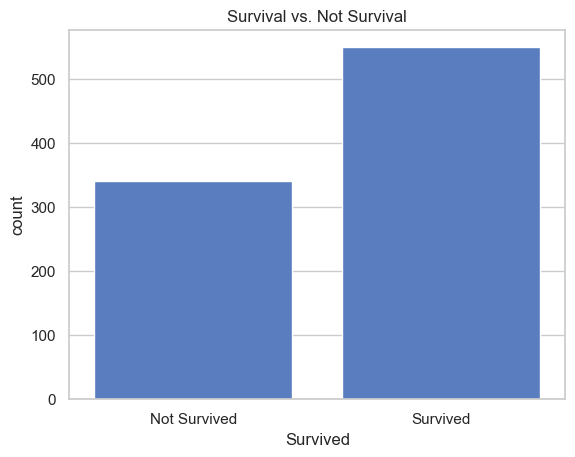

In [12]:
sns.countplot(data=df, x='Survived')

plt.title('Survival vs. Not Survival')
plt.show();

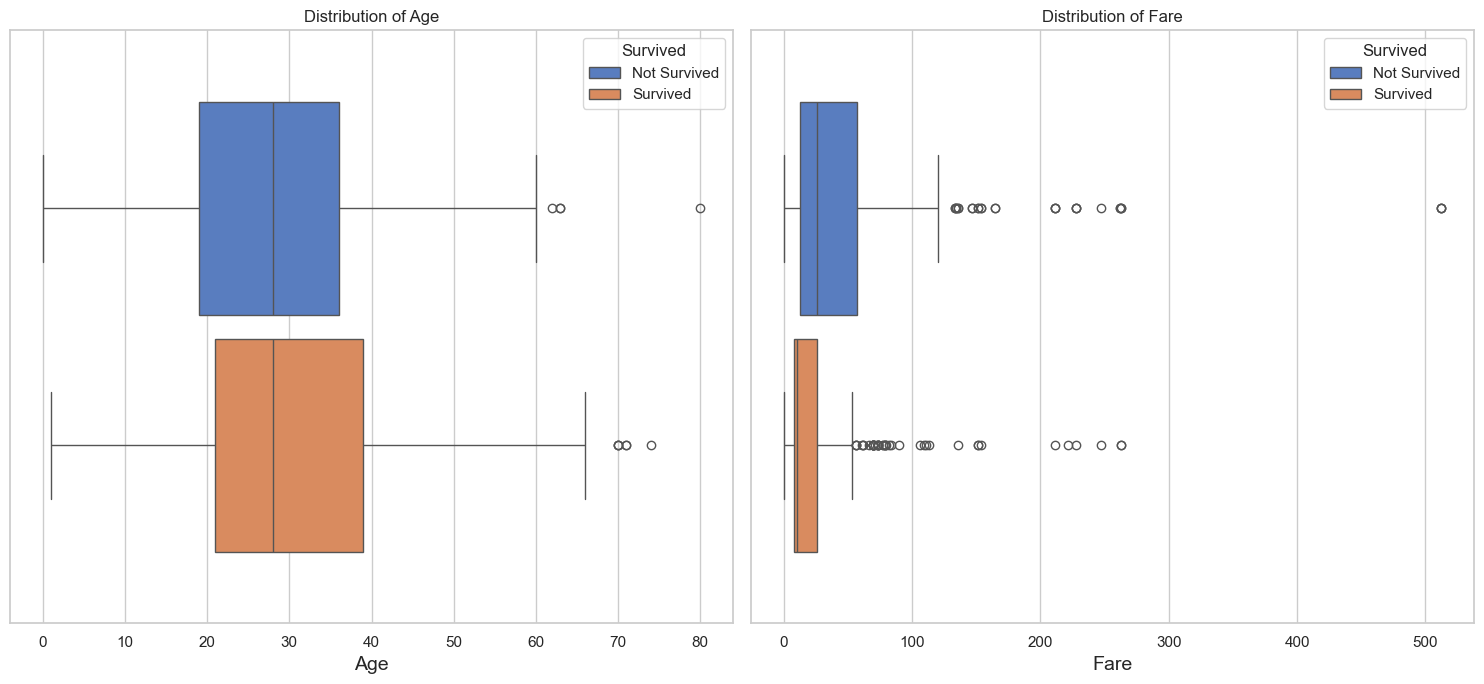

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(data=df, x='Age', hue='Survived', gap=0.1, ax=ax1)
ax1.set_xlabel('Age', fontsize=14)
ax1.set_title('Distribution of Age')

sns.boxplot(data=df, x='Fare', hue='Survived', gap=0.1, ax=ax2)
ax2.set_xlabel('Fare', fontsize=14)
ax2.set_title('Distribution of Fare')

plt.tight_layout()
plt.show();

In [14]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[
        (df[col] >= lower_bound) &
        (df[col] <= upper_bound)
    ]

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')

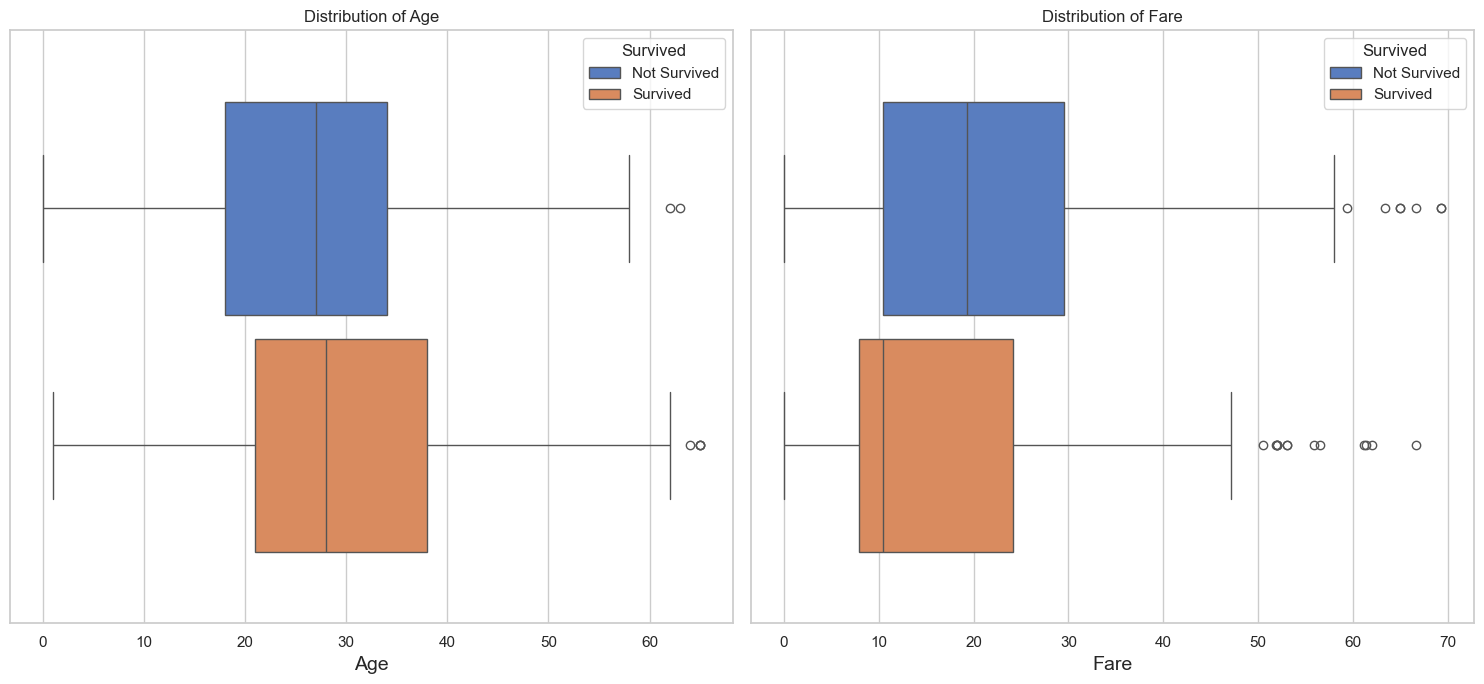

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(data=df, x='Age', hue='Survived', gap=0.1, ax=ax1)
ax1.set_xlabel('Age', fontsize=14)
ax1.set_title('Distribution of Age')

sns.boxplot(data=df, x='Fare', hue='Survived', gap=0.1, ax=ax2)
ax2.set_xlabel('Fare', fontsize=14)
ax2.set_title('Distribution of Fare')

plt.tight_layout()
plt.show();

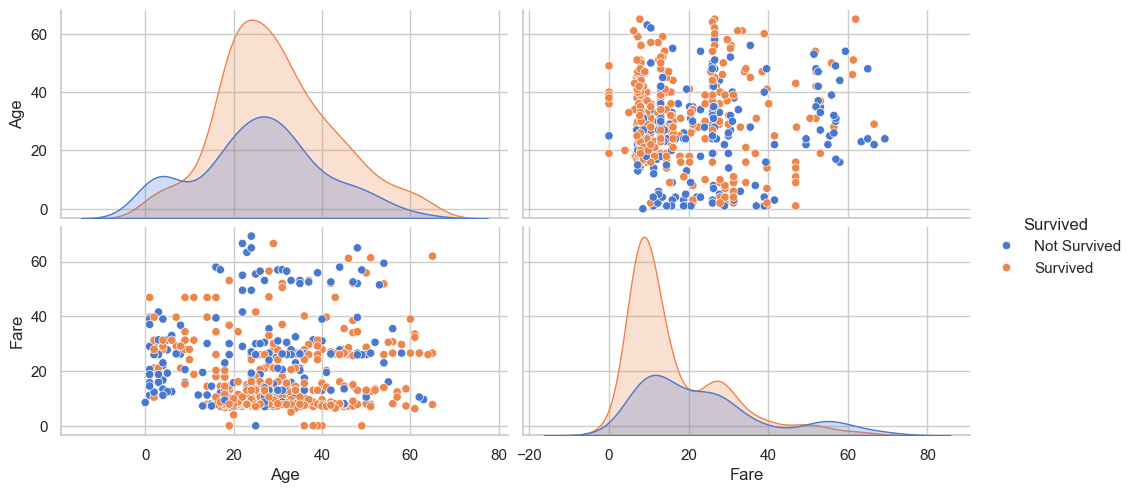

In [16]:
sns.pairplot(data=df, hue='Survived', aspect=2);

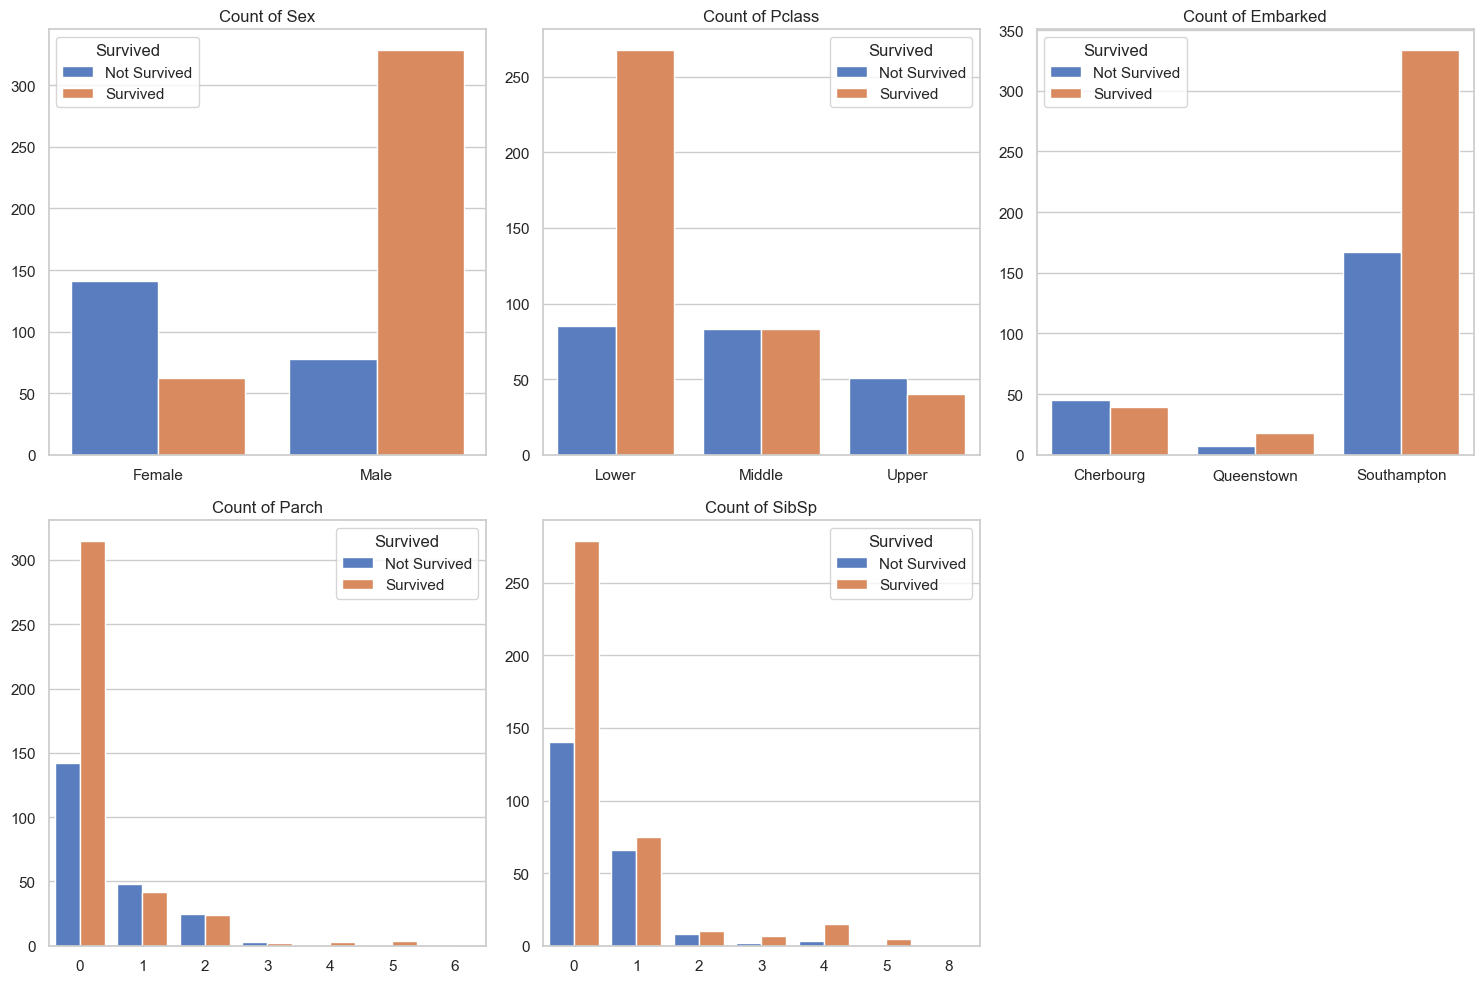

In [17]:
cat_cols = ['Sex', 'Pclass', 'Embarked', 'Parch', 'SibSp']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for feature, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(data=df, x=feature, hue='Survived', ax=ax)

    ax.set_title(f'Count of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show();